
# <span style="color:rgb(213,80,0)">PhysioNet Challenge</span>

2023-10-01

## Get patients list

In [1]:
p = get_patients();
patient = p(1);
folderPath = "training/"+patient;
if ~exist(folderPath, 'dir')
    mkdir(folderPath);
end
url = "https://physionet.org/files/i-care/2.0/training/";
% readtable(url+patient+"/RECORDS")
data = webread(url+patient+"/RECORDS");
data = strsplit(data, '\n');
data = string(data);
patient_card = webread(url+patient+"/"+patient+".txt")

patient_card = 
    'Patient: 0284
     Hospital: A
     Age: 53
     Sex: Male
     ROSC: nan
     OHCA: True
     Shockable Rhythm: True
     TTM: 33
     Outcome: Good
     CPC: 1
     '

## Retrieve and plot data

In [2]:
% filename = "0284_001_004_ECG.mat";
filename = data(1);

% disp(filename)
websave("training/"+patient+"/"+filename+".hea",url+patient+"/"+filename+".hea");
disp(filename+".hea saved")

0284_001_004_ECG.hea saved

In [3]:
websave("training/"+patient+"/"+filename+".mat",url+patient+"/"+filename+".mat");
disp(filename+".mat saved")

0284_001_004_ECG.mat saved


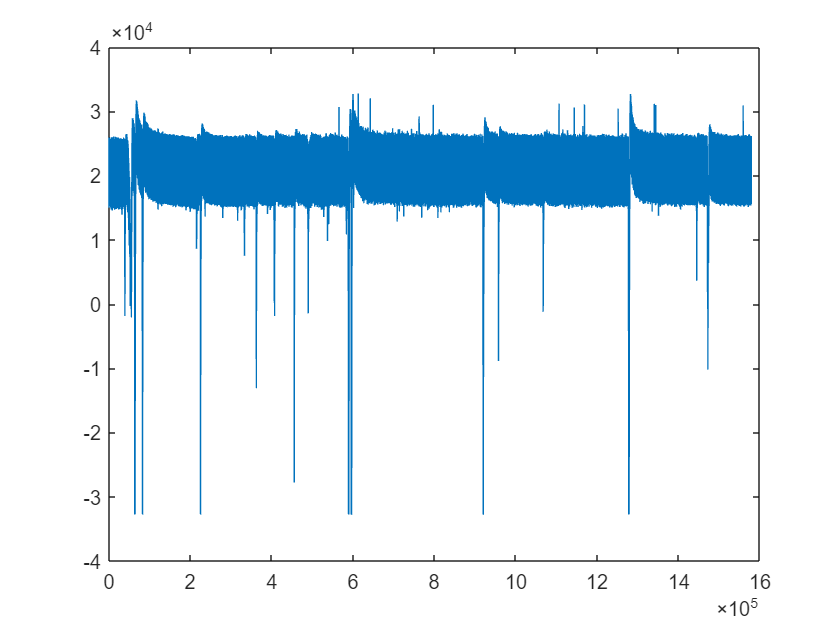

In [4]:
load("training/"+patient+"/"+filename+".mat")
plot(val)

## Train model

This repository contains a simple example that illustrates how to format a MATLAB entry for the George B. Moody PhysioNet Challenge 2023. [https://github.com/physionetchallenges/matlab-example-2023](https://github.com/physionetchallenges/matlab-example-2023)


In [5]:

if ~exist('matlab-example-2023','dir')
    repo = gitclone('https://github.com/physionetchallenges/matlab-example-2023');
    disp('Repo retrieved')
end
addpath('matlab-example-2023');

Repo retrieved

In [6]:
input_directory = 'training';
output_directory = 'output';
if ~exist(output_directory,'dir')
    mkdir(output_directory);
end
train_model(input_directory, 'output')

Finding challenge data...
Loading data for 1 patients...
Training the model...
Done.
Done.

In [7]:
load([output_directory '/model.mat'])
model_cpc

model_cpc = 
  TreeBagger
Ensemble with 100 bagged decision trees:
                    Training X:               [1x26]
                    Training Y:                [1x1]
                        Method:           regression
                 NumPredictors:                   26
         NumPredictorsToSample:                    9
                   MinLeafSize:                    5
                 InBagFraction:                    1
         SampleWithReplacement:                    1
          ComputeOOBPrediction:                    0
 ComputeOOBPredictorImportance:                    0
                     Proximity:                   []
  Properties, Methods

In [8]:
model_outcome

model_outcome = 
  TreeBagger
Ensemble with 100 bagged decision trees:
                    Training X:               [1x26]
                    Training Y:                [1x1]
                        Method:       classification
                 NumPredictors:                   26
         NumPredictorsToSample:                    6
                   MinLeafSize:                    1
                 InBagFraction:                    1
         SampleWithReplacement:                    1
          ComputeOOBPrediction:                    0
 ComputeOOBPredictorImportance:                    0
                     Proximity:                   []
                    ClassNames:             '0'
  Properties, Methods

In [9]:
function p = get_patients()
% Specify the URL
records_url = 'https://physionet.org/files/i-care/2.0/training/RECORDS';

% r = readtable(records_url)

% Read the content from the web
data = webread(records_url);

% Split the content by newline to get a cell array of strings
paths = strsplit(data, '\n');

% Remove empty cells, if any, from the cell array
paths = paths(~cellfun('isempty', paths));

% Initialize a cell array to hold the modified paths
patients = cell(size(paths));

% Loop over each path and perform the replacement operation
for i = 1:length(paths)
    patients{i} = regexprep(paths{i}, 'training', '');
    patients{i} = regexprep(patients{i}, '/', '');
end

% Display the original and modified paths
T = table(paths', patients', 'VariableNames', {'Path', 'Patient'});
% disp(T);
p = string(T.Patient);
end